In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
import math
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
A_train = pd.read_csv("classificationA.train", sep  = "\t", names=["X1","X2","Y"])
B_train = pd.read_csv("classificationB.train", sep  = "\t", names=["X1","X2","Y"])
C_train = pd.read_csv("classificationC.train", sep  = "\t", names=["X1","X2","Y"])

A_test = pd.read_csv("classificationA.test", sep  = "\t", names=["X1","X2","Y"])
B_test = pd.read_csv("classificationB.test", sep  = "\t", names=["X1","X2","Y"])
C_test = pd.read_csv("classificationC.test", sep  = "\t", names=["X1","X2","Y"])

In [4]:
A_train['X3'] = 1
B_train['X3'] = 1
C_train['X3'] = 1

A_test['X3'] = 1
B_test['X3'] = 1
C_test['X3'] = 1

### Estimation des paramètres

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [6]:
def logistic_regression(X, y, max_iter, w_init):
    w_t={}
    w_t[0] = w_init
    w = w_init

    for i in range(max_iter):
        D_eta = np.diag((sigmoid(X.dot(w))*(1-sigmoid(X.dot(w)))))
        eta = sigmoid(X.dot(w))
        w_ = pd.Series(inv(X.T.dot(D_eta).dot(X)).dot(X.T).dot(y-eta),index=["X1","X2","X3"])
        w = w + w_
        w_t[i+1] = w
        
    w_t = pd.DataFrame(w_t)
    
    return w_t, w

In [7]:
w_init = pd.Series([0,0,0], index = ["X1", "X2", "X3"])

/Users/Martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


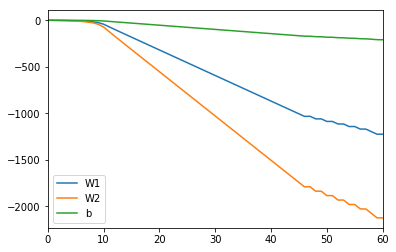

In [8]:
w_t_A, w_A = logistic_regression(A_train[["X1","X2","X3"]], A_train.Y, 60, w_init)
w_t_A.index = ["W1","W2","b"]
w_t_A.T.plot()

In [9]:
w_t_A[60]

W1   -1223.985881
W2   -2124.200828
b     -209.693280
Name: 60, dtype: float64

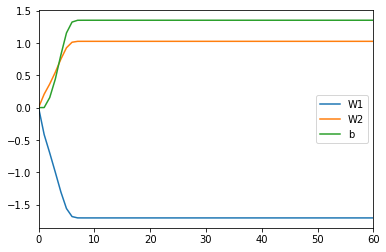

In [10]:
w_t_B, w_B = logistic_regression(B_train[["X1","X2","X3"]], B_train.Y, 60, w_init)
w_t_B.index = ["W1","W2","b"]
w_t_B.T.plot()

In [11]:
w_t_B[60]

W1   -1.705186
W2    1.023785
b     1.349592
Name: 60, dtype: float64

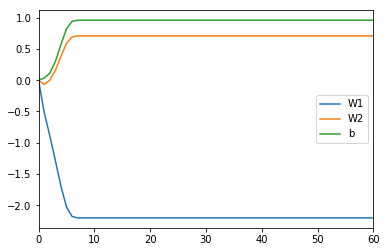

In [12]:
w_t_C, w_C = logistic_regression(C_train[["X1","X2","X3"]], C_train.Y, 60, w_init)
w_t_C.index = ["W1","W2","b"]
w_t_C.T.plot()

In [13]:
w_t_C[60]

W1   -2.203232
W2    0.709266
b     0.959189
Name: 60, dtype: float64

### Visualisation de la frontière

On a $\sigma(w^T x) = \sigma(w_1 x_1 + w_2 x_2 + w_3 \underbrace{x_3}_{1}) = \frac{1}{2} \Leftrightarrow w_1 x_1 + w_2 x_2 + w_3 \underbrace{x_3}_{1} = 0 \Leftrightarrow x_2 = \frac{1}{w_2} (- w_3 - w_1 x_1)$

In [14]:
def visualize(data, weights):
    color = ['red' if l else 'green' for l in data.Y]
    plt.scatter(data.X1, data.X2, color=color)

    x = np.linspace(data.X1.min(),data.X1.max(),1000)
    def f(t):
        return (1/weights.X2)*(- weights.X3 - weights.X1*t)
    plt.plot(x,f(x))
    plt.show()

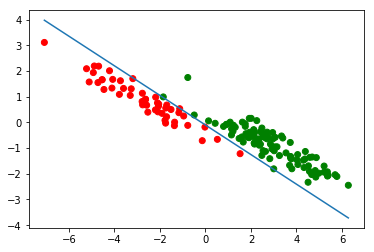

In [15]:
visualize(A_train,w_A)

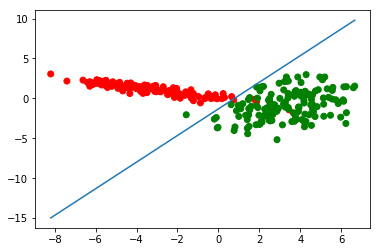

In [16]:
visualize(B_train,w_B)

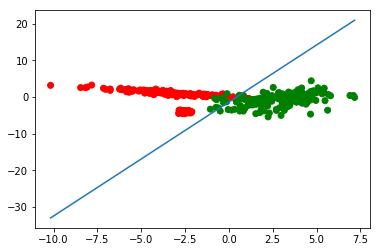

In [17]:
visualize(C_train,w_C)

### Calcul de l'erreur

Train

In [18]:
((A_train[["X1","X2","X3"]].dot(w_A) > 0) != A_train.Y).mean()

0.0

In [19]:
((B_train[["X1","X2","X3"]].dot(w_B) > 0) != B_train.Y).mean()

0.02

In [20]:
((C_train[["X1","X2","X3"]].dot(w_C) > 0) != C_train.Y).mean()

0.040000000000000001

Test

In [21]:
((A_test[["X1","X2","X3"]].dot(w_A) > 0) != A_test.Y).mean()

0.035333333333333335

In [22]:
((B_test[["X1","X2","X3"]].dot(w_B) > 0) != B_test.Y).mean()

0.042999999999999997

In [23]:
((C_test[["X1","X2","X3"]].dot(w_C) > 0) != C_test.Y).mean()

0.022666666666666668